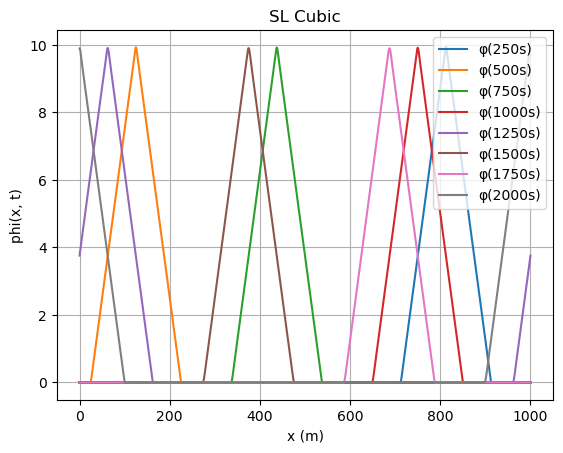

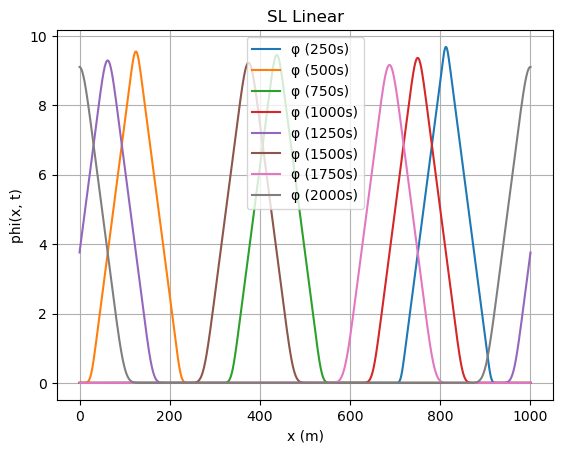

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
x1 = 1000
dx = 0.5
u = 0.75
dt = 1
t0 = 0
t1 = 2000
tp = 250  

nx = int(round((x1 - x0) / dx)) + 1
x = np.linspace(x0, x1, nx)

def phi0(x):
    if x < 400:
        return 0
    elif 400 <= x < 500:
        return 0.1 * (x - 400)
    elif 500 <= x <= 600:
        return 20 - 0.1 * (x - 400)
    else:
        return 0

phi = np.array([phi0(xi) for xi in x])


def CI(phi_n, xdep, dx, nx):
    m = int(np.floor(xdep / dx))
    a = (xdep / dx) - m
    xm2 = (m - 2) % nx
    xm1 = (m - 1) % nx
    xm  = m % nx
    xm1p = (m + 1) % nx
    return (
        -a * (1 - a**2) / 6 * phi_n[xm2]
        + a * (1 + a) * (2 - a) / 2 * phi_n[xm1]
        + (1 - a**2) * (2 - a) / 2 * phi_n[xm]
        - a * (1 - a) * (2 - a) / 6 * phi_n[xm1p]
    )


def LI(phi_n, xdep, dx, nx):
    m = int(np.floor(xdep / dx))
    a = (xdep / dx) - m
    xm1 = (m - 1) % nx
    xm  = m % nx
    return (a * phi_n[xm1]) + (1 - a) * phi_n[xm]


fig_cubic, ax_cubic = plt.subplots()
fig_linear, ax_linear = plt.subplots()


t = t0
phi_n_cubic = np.copy(phi)
phi_n1_cubic = np.copy(phi)

while t < t1:
    for j, xp in enumerate(x):
        xdep = x0 + (xp - u * dt) % (x1 - x0)
        phi_n1_cubic[j] = CI(phi_n_cubic, xdep, dx, nx)
    phi_n_cubic[:] = phi_n1_cubic[:]
    t = t + dt

    if t % tp < dt:
        ax_cubic.plot(x, phi_n_cubic, label=f'φ({int(t)}s)')


t = t0
phi_n_linear = np.copy(phi)
phi_n1_linear = np.copy(phi)

while t < t1:
    for j, xp in enumerate(x):
        xdep = x0 + (xp - u * dt) % (x1 - x0)
        phi_n1_linear[j] = LI(phi_n_linear, xdep, dx, nx)
    phi_n_linear[:] = phi_n1_linear[:]
    t = t + dt

    if t % tp < dt:
        ax_linear.plot(x, phi_n_linear, label=f'φ ({int(t)}s)')


ax_cubic.set_xlabel('x (m)')
ax_cubic.set_ylabel('phi(x, t)')
ax_cubic.set_title('SL Cubic')
ax_cubic.legend()
ax_cubic.grid(True)

ax_linear.set_xlabel('x (m)')
ax_linear.set_ylabel('phi(x, t)')
ax_linear.set_title('SL Linear')
ax_linear.legend()
ax_linear.grid(True)
plt.show()


I think that in this code, we do not need to worry about the CFL. Because the methods that are given differ from traditional explicit finite difference schemes. Instead of relying on the CFL condition, these methods follow the flow of the equation, so, this allows the values to be interpolated at upstream locations regardless of the time step size. So, the methods track the information upstream, and remains stable even for C > 1.